In [2]:
import tensorflow as tf
import numpy as np

2023-02-15 06:26:57.125140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 06:26:58.404234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-15 06:26:58.404295: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-15 06:27:01.707252: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7:

In [3]:
Xtrain = np.linspace(-10, 10, num=1000, dtype=np.float32)
ytrain = 0.8 * (Xtrain - 3) **2 - 3 + 2 * np.random.randn(*Xtrain.shape)
ytrain = ytrain.astype(np.float32)

(1000,)

(1000,)

In [27]:

class Model:

    def __init__(self):
        self.A = tf.Variable(np.random.rand(1), dtype=tf.float32)
        self.B = tf.Variable(np.random.rand(1), dtype=tf.float32)
        self.C = tf.Variable(np.random.rand(1), dtype=tf.float32)

        self.optimizer = tf.optimizers.SGD(learning_rate=0.0002)        

    @property
    def trainable_params(self):
        return (self.A, self.B, self.C)
    
    def call(self, X):
        return self.A * X ** 2 + self.B * X + self.C
    
    def fit(self, X, y, epochs=100):      
        for i in range(epochs):
            with tf.GradientTape() as tape:
                predict = self.call(X)
                
                # find the MSE of the loss
                loss = tf.reduce_mean((y - predict) ** 2)
                
                
                grads = tape.gradient(loss, self.trainable_params)
                self.optimizer.apply_gradients(zip(grads, self.trainable_params))
                
                
            print(f'epoch {i+1} training loss: {loss}')


In [29]:
m = Model()

m.fit(Xtrain, ytrain, epochs=300)


epoch 1 training loss: 1139.01220703125
epoch 2 training loss: 1016.6279907226562
epoch 3 training loss: 986.3212890625
epoch 4 training loss: 960.2515258789062
epoch 5 training loss: 935.006103515625
epoch 6 training loss: 910.4358520507812
epoch 7 training loss: 886.5179443359375
epoch 8 training loss: 863.2347412109375
epoch 9 training loss: 840.5695190429688
epoch 10 training loss: 818.5057373046875
epoch 11 training loss: 797.0276489257812
epoch 12 training loss: 776.1194458007812
epoch 13 training loss: 755.76611328125
epoch 14 training loss: 735.9530639648438
epoch 15 training loss: 716.665771484375
epoch 16 training loss: 697.890380859375
epoch 17 training loss: 679.6130981445312
epoch 18 training loss: 661.821044921875
epoch 19 training loss: 644.5010986328125
epoch 20 training loss: 627.6408081054688
epoch 21 training loss: 611.22802734375
epoch 22 training loss: 595.2506713867188
epoch 23 training loss: 579.6974487304688
epoch 24 training loss: 564.5570068359375
epoch 25 tra

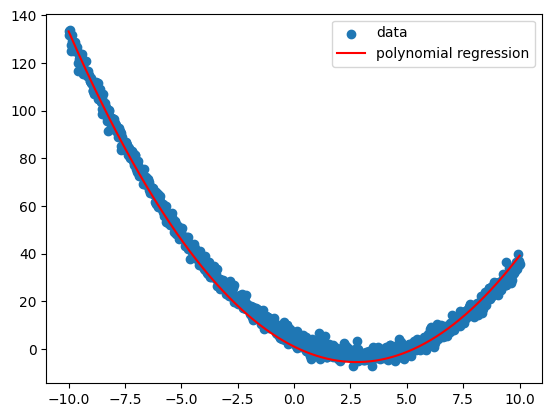

In [30]:
import matplotlib.pyplot as plt

y_pred = m.call(Xtrain)

plt.scatter(Xtrain, ytrain, label='data')
plt.plot(Xtrain, y_pred, color='r', label='polynomial regression')
plt.legend()
plt.show()